# Basic use of the relative feature tightness measure

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import numpy as np
from ast import literal_eval
import re
import sys
sys.path.insert(0,"./../fip3")
from fip import profiles
from matplotlib.pyplot import figure

## Dataset prep

### Making feature pointwise mutual information profiles

In [8]:
profile0 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp0_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile2 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp2_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile3 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp3_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile4 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp4_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile5 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp5_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile6 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp6_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile7 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp7_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)
profile8 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp8_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)
profile9 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp9_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)

In [9]:
profile0.add_another_cooccurrence_profile(profile2)
profile0.add_another_cooccurrence_profile(profile3)
profile0.add_another_cooccurrence_profile(profile4)
profile0.add_another_cooccurrence_profile(profile5)
profile0.add_another_cooccurrence_profile(profile6)
profile0.add_another_cooccurrence_profile(profile7)
profile0.add_another_cooccurrence_profile(profile8)
profile0.add_another_cooccurrence_profile(profile9)
profile0.df

value
feature1 feature2       
0        0          3083
         1          1054
         10          139
         100          48
         1000         42
...                  ...
997      998           7
         999          17
998      998        2907
         999          90
999      999        6485

[2095427 rows x 1 columns]

In [10]:
probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(profile0)
probability_profile.df

value
feature1 feature2          
0        0         0.008868
         1         0.003032
         10        0.000400
         100       0.000138
         1000      0.000121
...                     ...
997      998       0.000020
         999       0.000049
998      998       0.008361
         999       0.000259
999      999       0.018653

[2095427 rows x 1 columns]

In [11]:
pmi_profile = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(probability_profile)
pmi_profile

In [12]:
reference_profile0 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp0_37902.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37902)
reference_profile2 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp2_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile3 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp3_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile4 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp4_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile5 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp5_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile6 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp6_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile7 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp7_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile8 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp8_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile9 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp9_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)

In [13]:
reference_profile0.add_another_cooccurrence_profile(reference_profile2)
reference_profile0.add_another_cooccurrence_profile(reference_profile3)
reference_profile0.add_another_cooccurrence_profile(reference_profile4)
reference_profile0.add_another_cooccurrence_profile(reference_profile5)
reference_profile0.add_another_cooccurrence_profile(reference_profile6)
reference_profile0.add_another_cooccurrence_profile(reference_profile7)
reference_profile0.add_another_cooccurrence_profile(reference_profile8)
reference_profile0.add_another_cooccurrence_profile(reference_profile9)
reference_profile0.df

value
feature1 feature2       
0        0           731
         1           145
         10            4
         1000          3
         1001          3
...                  ...
997      998          16
         999          36
998      998        2498
         999          54
999      999        4018

[2073180 rows x 1 columns]

In [14]:
reference_probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(reference_profile0)
reference_probability_profile.df

value
feature1 feature2          
0        0         0.002143
         1         0.000425
         10        0.000012
         1000      0.000009
         1001      0.000009
...                     ...
997      998       0.000047
         999       0.000106
998      998       0.007323
         999       0.000158
999      999       0.011779

[2073180 rows x 1 columns]

In [15]:
reference_pmi_profile = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(reference_probability_profile)
reference_pmi_profile

### Making feature pointwise KL divergence profile between COCONUT and ZINC

In [16]:
difference_pkld_profile = profiles.PointwiseKLDivergenceProfile.from_cooccurrence_probability_profiles(
    probability_profile, reference_probability_profile)
difference_pkld_profile.df

value
feature1 feature2          
0        0         2.048922
         1         2.834281
         10        5.091472
         100       5.557498
         1000      3.779886
...                     ...
928      972      -0.027473
939      986      -1.027473
959      995      -0.027473
968      990      -3.486905
969      995      -0.027473

[2098006 rows x 1 columns]

### Sampling structures from COCONUT and ZINC datasets

In [17]:
coconut_samples = pd.read_csv('../data/CP1/COCONUT/COCOrandom.csv', delimiter = ' ')
coconut_samples = coconut_samples.drop(['Coconut_id'], axis=1)
coconut_samples['Name'] = 'COCONUT'
coconut_samples

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
0,CCCCCC1C(=O)CCC1CC(=O)OC,226.156895,2.72510,KVWWIYGFBYDJQC-UHFFFAOYSA-N,KVWWIYGFBYDJQC,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 142, 195, 226, 294, 314, 334, 339, 370, 5..."
1,Cc1c2c(cc3c1oc(=O)c1ccccc13)CN(c1cccc(Cl)c1)CO2,377.081871,5.26452,DWNKYEMDZRSBHK-UHFFFAOYSA-N,DWNKYEMDZRSBHK,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[133, 137, 165, 216, 252, 314, 350, 382, 398, ..."
2,COc1cc(C2CC(=O)Oc3ccc4c(=O)c(-c5ccccc5)coc4c32...,458.136553,4.92680,ZRAWZNDFONIPGO-UHFFFAOYSA-N,ZRAWZNDFONIPGO,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[45, 60, 133, 145, 222, 227, 231, 249, 282, 28..."
3,C=C1C(=O)OC2C=C(CO)CCC(OCC)C3=CC(OC3=O)C12,320.125988,1.05360,PTJPAEBQCZMNAV-UHFFFAOYSA-N,PTJPAEBQCZMNAV,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[35, 80, 176, 222, 294, 314, 408, 514, 650, 65..."
4,CC(=O)C(CC=C(C)C)C(C)=CCOc1ccc(CCNC(=O)c2ccccc...,419.246044,5.54570,FGXBFPFGWRVMGG-UHFFFAOYSA-N,FGXBFPFGWRVMGG,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 8, 80, 102, 197, 265, 310, 322, 367, 389, ..."
...,...,...,...,...,...,...,...,...
386292,COC(=O)C1=COC(OC2OC(COC(=O)c3ccc(O)c(OC)c3)C(O...,554.163556,-0.63720,LIVSNGMPJUCRLO-UHFFFAOYSA-N,LIVSNGMPJUCRLO,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[58, 80, 145, 147, 167, 231, 233, 249, 314, 42..."
386293,Cc1c(CCC(=O)NCC(=O)NCC(=O)[O-])c(=O)oc2cc(O)c(...,395.065152,-0.62468,SSZVGMXOKPZNCV-UHFFFAOYSA-M,SSZVGMXOKPZNCV,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[41, 80, 197, 252, 254, 305, 314, 366, 406, 42..."
386294,CC(=O)Oc1c(C)cc2c(c1O)C(=O)C(C1=CC(=O)c3cc(C)c...,490.089997,2.87624,JODPOMYHTFZNTK-UHFFFAOYSA-N,JODPOMYHTFZNTK,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[16, 39, 84, 202, 224, 314, 333, 352, 516, 641..."
386295,C[N+]([O-])=NCOC1OC(CO)C(O)C(OC2OC(COC3OC(CO)C...,576.201398,-6.99890,STHHNNUYQQUJGY-UHFFFAOYSA-N,STHHNNUYQQUJGY,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[77, 80, 170, 222, 349, 443, 489, 588, 610, 65..."


In [18]:
df_split_coco = np.array_split(coconut_samples, 10)

In [19]:
df_split_coco[1]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
38630,CC1(CCOC2OC(CO)C(O)C(O)C2O)CCC2C(=CCC3C(C)(C(=...,482.287968,2.22680,MHRXJYCBHPYIQC-UHFFFAOYSA-N,MHRXJYCBHPYIQC,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[13, 30, 55, 57, 80, 170, 184, 222, 223, 290, ..."
38631,CC(=O)Oc1ccc(C2COc3c(ccc4c3C=CC(C)(C)O4)C2)c(O...,408.157288,4.44010,MOXLQFRINKKXKS-UHFFFAOYSA-N,MOXLQFRINKKXKS,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 6, 53, 212, 231, 322, 441, 547, 555, 635, ..."
38632,O=C(Cc1ccccc1)Nc1ccccc1,211.099714,2.86780,KYPIASPTMDEDQB-UHFFFAOYSA-N,KYPIASPTMDEDQB,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[41, 80, 191, 325, 389, 650, 703, 730, 807, 90..."
38633,COc1cc(C(CC(=O)NCC(c2ccco2)N2CCCCCC2)c2oc(C)cc...,510.236601,4.21652,HRHPHOHIXYXXAF-UHFFFAOYSA-N,HRHPHOHIXYXXAF,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 2, 41, 80, 130, 166, 197, 202, 249, 258, 2..."
38634,CC(=O)OC1CC(C)(C)C(=C=CC(C)=CC=CC(C)=CC=CC=C(C...,700.433904,9.26300,OKMNTAQZMKYJIR-UHFFFAOYSA-N,OKMNTAQZMKYJIR,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[31, 55, 80, 112, 119, 136, 161, 173, 227, 266..."
...,...,...,...,...,...,...,...,...
77255,CCC1CN(C(=O)c2ccccc2)CCC1CC(=O)NCc1cccnc1,365.210327,3.27640,KOWJWYRAMHHKAR-UHFFFAOYSA-N,KOWJWYRAMHHKAR,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[41, 80, 196, 197, 226, 255, 294, 333, 378, 38..."
77256,C=C(C)C1CCC2(C(=O)OC)CCC3(C)C(CCC4C5(C)CC(=Cc6...,586.402210,9.08820,CDQMFMRWVGTBOW-UHFFFAOYSA-N,CDQMFMRWVGTBOW,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[89, 175, 188, 209, 249, 267, 281, 294, 310, 3..."
77257,C=CC(C)=CCC1C(=C)CCC2C(C)(C)C(OC(C)=O)C(O)CC12C,346.250795,4.82000,LKMOGVWLLWEGRV-UHFFFAOYSA-N,LKMOGVWLLWEGRV,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[7, 35, 80, 104, 117, 198, 233, 478, 479, 483,..."
77258,CCCCCC=CCCCCCC=CCC(OC(C)=O)C(COC1OC(COC(C)=O)C...,965.607571,9.55880,DIKUPRJWGNBRNH-UHFFFAOYSA-N,DIKUPRJWGNBRNH,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 58, 62, 69, 80, 117, 118, 147, 294, 401, 5..."


In [20]:
zinc_samples = pd.read_csv('../data/CP1/ZINC/ZINCrandom.csv', delimiter = ' ')
zinc_samples = zinc_samples.drop(['Zinc_id'], axis=1)
zinc_samples

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
0,Cc1ccc(-n2c(=O)c3c(n4c(SCCc5ccccc5)nnc24)-c2cc...,532.229683,6.94842,DPUIXUVMXJXCJR-UHFFFAOYSA-N,DPUIXUVMXJXCJR,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[2, 58, 74, 80, 105, 116, 153, 233, 235, 289, ..."
1,Cc1ccc(-n2c(COc3ccccc3)nnc2SCC(=O)Nc2ccc3c(c2)...,488.151826,4.65672,HVIYVAXZIXJRQC-UHFFFAOYSA-N,HVIYVAXZIXJRQC,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[41, 58, 80, 102, 116, 127, 184, 191, 233, 235..."
2,COCCNS(=O)(=O)c1ccc(OCC(=O)N2CCC(C(N)=O)CC2)c(...,433.107434,0.36740,RAILYSNQBZZKMQ-UHFFFAOYSA-N,RAILYSNQBZZKMQ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[13, 80, 94, 111, 140, 198, 222, 279, 317, 319..."
3,Cc1ccc(S(=O)(=O)n2nc(NCc3cccc(Br)c3)nc2NCc2ccc...,588.978270,5.57272,FFUQFTXMHIMSHO-UHFFFAOYSA-N,FFUQFTXMHIMSHO,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 82, 92, 157, 235, 255, 319, 350, 374, 378..."
4,CCn1c(-c2ccccc2)c(C)s/c1=N\C(=O)c1ccccc1Br,400.024496,5.04852,GMWZBJMZXGQSQF-VZCXRCSSSA-N,GMWZBJMZXGQSQF,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[30, 34, 57, 80, 162, 289, 294, 308, 313, 351,..."
...,...,...,...,...,...,...,...,...
379007,CCOC(=O)C1=C(C)N=c2s/c(=C\c3ccc(OCC)c(OC)c3)c(...,478.156243,3.20560,NKVUPLXRBGDCKZ-FQWPPLDYSA-N,NKVUPLXRBGDCKZ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[25, 80, 94, 125, 145, 147, 162, 237, 249, 281..."
379008,CCCCOc1ccc(-c2nn(-c3ccccc3)cc2CNC(=O)c2ccc(OCC...,501.242770,6.57610,GRVSBYRYFLOHAZ-UHFFFAOYSA-N,GRVSBYRYFLOHAZ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[13, 76, 80, 94, 102, 197, 255, 265, 294, 322,..."
379009,CNc1cc([C@H]2CCCN(Cc3cccc(C)c3)C2)nc(-c2cccnc2)n1,373.226646,4.26832,WGJHTUZEMVLXOF-FQEVSTJZSA-N,WGJHTUZEMVLXOF,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 105, 257, 378, 437, 446, 736, 739, 744, 7..."
379010,COc1ccc(C23CC4CC(CC(C4)C2)C3)cc1C(=O)NC(c1cccc...,451.251129,6.68240,GUGKIBFTNCSUKM-UHFFFAOYSA-N,GUGKIBFTNCSUKM,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 46, 94, 117, 235, 249, 389, 484, 486, 556,..."


In [21]:
df_split_zinc = np.array_split(zinc_samples, 10)
df_split_zinc[1]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
37902,CCOC(=O)c1c(NC(=O)c2cnn3c(C(F)(F)F)cc(-c4ccco4...,504.107911,5.37740,DBNMVSOUCKPJLS-UHFFFAOYSA-N,DBNMVSOUCKPJLS,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 42, 43, 50, 54, 80, 114, 121, 145, 147, 16..."
37903,COc1ccc(SCC(=O)N2CCN(c3cccc(C)c3C)CC2)cc1OC,400.182064,3.76154,OWMOGVDMJOXVOB-UHFFFAOYSA-N,OWMOGVDMJOXVOB,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 94, 116, 140, 231, 249, 252, 341, 407, 41..."
37904,O=[N+]([O-])c1ccc(C=NNc2nc3ccccc3s2)c(Cl)c1,332.013474,4.30390,ZFKLEPKVKZQURU-UHFFFAOYSA-N,ZFKLEPKVKZQURU,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[65, 162, 201, 289, 366, 378, 385, 461, 557, 5..."
37905,O=C(CC(c1ccccc1)c1ccccc1)Nc1c(C(=O)Nc2ccc(F)cc...,478.169271,6.98490,XXGXESGHDPBIIE-UHFFFAOYSA-N,XXGXESGHDPBIIE,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 41, 61, 75, 80, 90, 154, 191, 267, 311, 36..."
37906,CCC(C)(C)c1ccc(OCCCC(=O)Nc2ccc(OC)c(NC(=O)[C@@...,784.404729,7.99440,VVUGGKDAGAIRQJ-KXQOOQHDSA-N,VVUGGKDAGAIRQJ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 13, 41, 69, 80, 83, 94, 114, 145, 184, 191..."
...,...,...,...,...,...,...,...,...
75799,Cc1ccc(/C=[N+]2\NC(=O)[C@@H](NC(=O)c3ccc(C)cc3...,412.201953,3.62796,MRARDBMAVPPAHB-HTZJYPRQSA-O,MRARDBMAVPPAHB,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[25, 233, 235, 250, 261, 288, 314, 387, 463, 4..."
75800,O=C(CSCc1c(Cl)cccc1Cl)Nc1ccc(Cc2ccncc2)cc1,416.051690,5.85110,GONDLAVKCOKFSF-UHFFFAOYSA-N,GONDLAVKCOKFSF,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[19, 41, 80, 116, 191, 246, 310, 366, 378, 383..."
75801,CN(CC1CC1)C[C@@H]1CCN(C(=O)NCCn2cnc(C#N)n2)C1,331.212058,0.52308,JGECGSWGWFIZPV-AWEZNQCLSA-N,JGECGSWGWFIZPV,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[29, 80, 197, 218, 295, 369, 378, 586, 650, 65..."
75802,CNC(=O)c1ccc(CN(C)C(=O)CCN2C(=O)[C@H](C)Oc3ccc...,395.184506,2.20880,POGHUUQHXYOGFU-HNNXBMFYSA-N,POGHUUQHXYOGFU,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[5, 80, 87, 116, 148, 310, 314, 327, 334, 345,..."


In [22]:
joint_samples = pd.concat((df_split_coco[1], df_split_zinc[1]), ignore_index=True)

In [23]:
joint_samples

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
0,CC1(CCOC2OC(CO)C(O)C(O)C2O)CCC2C(=CCC3C(C)(C(=...,482.287968,2.22680,MHRXJYCBHPYIQC-UHFFFAOYSA-N,MHRXJYCBHPYIQC,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[13, 30, 55, 57, 80, 170, 184, 222, 223, 290, ..."
1,CC(=O)Oc1ccc(C2COc3c(ccc4c3C=CC(C)(C)O4)C2)c(O...,408.157288,4.44010,MOXLQFRINKKXKS-UHFFFAOYSA-N,MOXLQFRINKKXKS,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 6, 53, 212, 231, 322, 441, 547, 555, 635, ..."
2,O=C(Cc1ccccc1)Nc1ccccc1,211.099714,2.86780,KYPIASPTMDEDQB-UHFFFAOYSA-N,KYPIASPTMDEDQB,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[41, 80, 191, 325, 389, 650, 703, 730, 807, 90..."
3,COc1cc(C(CC(=O)NCC(c2ccco2)N2CCCCCC2)c2oc(C)cc...,510.236601,4.21652,HRHPHOHIXYXXAF-UHFFFAOYSA-N,HRHPHOHIXYXXAF,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 2, 41, 80, 130, 166, 197, 202, 249, 258, 2..."
4,CC(=O)OC1CC(C)(C)C(=C=CC(C)=CC=CC(C)=CC=CC=C(C...,700.433904,9.26300,OKMNTAQZMKYJIR-UHFFFAOYSA-N,OKMNTAQZMKYJIR,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[31, 55, 80, 112, 119, 136, 161, 173, 227, 266..."
...,...,...,...,...,...,...,...,...
76527,Cc1ccc(/C=[N+]2\NC(=O)[C@@H](NC(=O)c3ccc(C)cc3...,412.201953,3.62796,MRARDBMAVPPAHB-HTZJYPRQSA-O,MRARDBMAVPPAHB,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[25, 233, 235, 250, 261, 288, 314, 387, 463, 4..."
76528,O=C(CSCc1c(Cl)cccc1Cl)Nc1ccc(Cc2ccncc2)cc1,416.051690,5.85110,GONDLAVKCOKFSF-UHFFFAOYSA-N,GONDLAVKCOKFSF,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[19, 41, 80, 116, 191, 246, 310, 366, 378, 383..."
76529,CN(CC1CC1)C[C@@H]1CCN(C(=O)NCCn2cnc(C#N)n2)C1,331.212058,0.52308,JGECGSWGWFIZPV-AWEZNQCLSA-N,JGECGSWGWFIZPV,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[29, 80, 197, 218, 295, 369, 378, 586, 650, 65..."
76530,CNC(=O)c1ccc(CN(C)C(=O)CCN2C(=O)[C@H](C)Oc3ccc...,395.184506,2.20880,POGHUUQHXYOGFU-HNNXBMFYSA-N,POGHUUQHXYOGFU,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[5, 80, 87, 116, 148, 310, 314, 327, 334, 345,..."


In [24]:
for x in joint_samples.index:
    a = joint_samples['Bitset'][x]
    a = a.split(", ")
    a = re.sub('\[', '', str(a))
    a = re.sub('\]', '', str(a))
    tup = literal_eval(a)
    joint_samples['Bitset'][x] = tup

/var/tmp/pbs.43231.lich-compute.vscht.cz/ipykernel_10292/3101749155.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_samples['Bitset'][x] = tup


In [25]:
joint_samples

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
0,CC1(CCOC2OC(CO)C(O)C(O)C2O)CCC2C(=CCC3C(C)(C(=...,482.287968,2.22680,MHRXJYCBHPYIQC-UHFFFAOYSA-N,MHRXJYCBHPYIQC,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(13, 30, 55, 57, 80, 170, 184, 222, 223, 290, ..."
1,CC(=O)Oc1ccc(C2COc3c(ccc4c3C=CC(C)(C)O4)C2)c(O...,408.157288,4.44010,MOXLQFRINKKXKS-UHFFFAOYSA-N,MOXLQFRINKKXKS,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(1, 6, 53, 212, 231, 322, 441, 547, 555, 635, ..."
2,O=C(Cc1ccccc1)Nc1ccccc1,211.099714,2.86780,KYPIASPTMDEDQB-UHFFFAOYSA-N,KYPIASPTMDEDQB,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(41, 80, 191, 325, 389, 650, 703, 730, 807, 90..."
3,COc1cc(C(CC(=O)NCC(c2ccco2)N2CCCCCC2)c2oc(C)cc...,510.236601,4.21652,HRHPHOHIXYXXAF-UHFFFAOYSA-N,HRHPHOHIXYXXAF,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(1, 2, 41, 80, 130, 166, 197, 202, 249, 258, 2..."
4,CC(=O)OC1CC(C)(C)C(=C=CC(C)=CC=CC(C)=CC=CC=C(C...,700.433904,9.26300,OKMNTAQZMKYJIR-UHFFFAOYSA-N,OKMNTAQZMKYJIR,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(31, 55, 80, 112, 119, 136, 161, 173, 227, 266..."
...,...,...,...,...,...,...,...,...
76527,Cc1ccc(/C=[N+]2\NC(=O)[C@@H](NC(=O)c3ccc(C)cc3...,412.201953,3.62796,MRARDBMAVPPAHB-HTZJYPRQSA-O,MRARDBMAVPPAHB,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(25, 233, 235, 250, 261, 288, 314, 387, 463, 4..."
76528,O=C(CSCc1c(Cl)cccc1Cl)Nc1ccc(Cc2ccncc2)cc1,416.051690,5.85110,GONDLAVKCOKFSF-UHFFFAOYSA-N,GONDLAVKCOKFSF,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(19, 41, 80, 116, 191, 246, 310, 366, 378, 383..."
76529,CN(CC1CC1)C[C@@H]1CCN(C(=O)NCCn2cnc(C#N)n2)C1,331.212058,0.52308,JGECGSWGWFIZPV-AWEZNQCLSA-N,JGECGSWGWFIZPV,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(29, 80, 197, 218, 295, 369, 378, 586, 650, 65..."
76530,CNC(=O)c1ccc(CN(C)C(=O)CCN2C(=O)[C@H](C)Oc3ccc...,395.184506,2.20880,POGHUUQHXYOGFU-HNNXBMFYSA-N,POGHUUQHXYOGFU,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(5, 80, 87, 116, 148, 310, 314, 327, 334, 345,..."


## Relative feature tightness against a PMI interrelation profile

In [26]:
joint_samples['RFT'] = joint_samples['Bitset'].apply(
    lambda x: difference_pkld_profile.relative_feature_divergence(x))
joint_samples

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,RFT
0,CC1(CCOC2OC(CO)C(O)C(O)C2O)CCC2C(=CCC3C(C)(C(=...,482.287968,2.22680,MHRXJYCBHPYIQC-UHFFFAOYSA-N,MHRXJYCBHPYIQC,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(13, 30, 55, 57, 80, 170, 184, 222, 223, 290, ...",3.145458
1,CC(=O)Oc1ccc(C2COc3c(ccc4c3C=CC(C)(C)O4)C2)c(O...,408.157288,4.44010,MOXLQFRINKKXKS-UHFFFAOYSA-N,MOXLQFRINKKXKS,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(1, 6, 53, 212, 231, 322, 441, 547, 555, 635, ...",1.343406
2,O=C(Cc1ccccc1)Nc1ccccc1,211.099714,2.86780,KYPIASPTMDEDQB-UHFFFAOYSA-N,KYPIASPTMDEDQB,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(41, 80, 191, 325, 389, 650, 703, 730, 807, 90...",-0.979940
3,COc1cc(C(CC(=O)NCC(c2ccco2)N2CCCCCC2)c2oc(C)cc...,510.236601,4.21652,HRHPHOHIXYXXAF-UHFFFAOYSA-N,HRHPHOHIXYXXAF,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(1, 2, 41, 80, 130, 166, 197, 202, 249, 258, 2...",0.956484
4,CC(=O)OC1CC(C)(C)C(=C=CC(C)=CC=CC(C)=CC=CC=C(C...,700.433904,9.26300,OKMNTAQZMKYJIR-UHFFFAOYSA-N,OKMNTAQZMKYJIR,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(31, 55, 80, 112, 119, 136, 161, 173, 227, 266...",1.898562
...,...,...,...,...,...,...,...,...,...
76527,Cc1ccc(/C=[N+]2\NC(=O)[C@@H](NC(=O)c3ccc(C)cc3...,412.201953,3.62796,MRARDBMAVPPAHB-HTZJYPRQSA-O,MRARDBMAVPPAHB,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(25, 233, 235, 250, 261, 288, 314, 387, 463, 4...",-0.473733
76528,O=C(CSCc1c(Cl)cccc1Cl)Nc1ccc(Cc2ccncc2)cc1,416.051690,5.85110,GONDLAVKCOKFSF-UHFFFAOYSA-N,GONDLAVKCOKFSF,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(19, 41, 80, 116, 191, 246, 310, 366, 378, 383...",-1.282749
76529,CN(CC1CC1)C[C@@H]1CCN(C(=O)NCCn2cnc(C#N)n2)C1,331.212058,0.52308,JGECGSWGWFIZPV-AWEZNQCLSA-N,JGECGSWGWFIZPV,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(29, 80, 197, 218, 295, 369, 378, 586, 650, 65...",-0.873616
76530,CNC(=O)c1ccc(CN(C)C(=O)CCN2C(=O)[C@H](C)Oc3ccc...,395.184506,2.20880,POGHUUQHXYOGFU-HNNXBMFYSA-N,POGHUUQHXYOGFU,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(5, 80, 87, 116, 148, 310, 314, 327, 334, 345,...",-0.454486


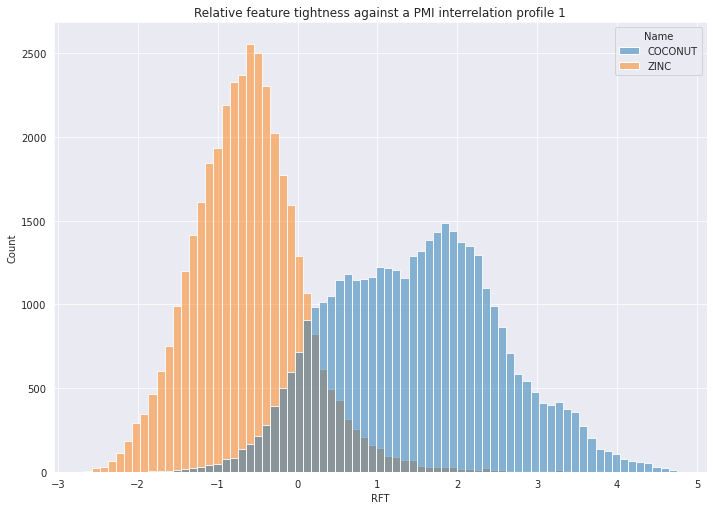

In [27]:
a4_dims = (11.7, 8.27)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(joint_samples, x='RFT', hue='Name')
plt.title('Relative feature tightness against a PMI interrelation profile 1')
plt.savefig(f"../images//joint_samples_RFT1.svg", format="svg")

According to the histogram, there is a visible split between Relative feature tightness distribution against the pointwise KL divergence profile between COCONUT and ZINC datasets, based on their radius 2 fragments. Larger fragments might diverge even further.

# ROC CURVE

In [33]:
from matplotlib.pyplot import figure
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(joint_samples['Name'], joint_samples['RFT'], pos_label = 'COCONUT')
roc_auc = metrics.auc(fpr, tpr)

<Figure size 432x288 with 0 Axes>

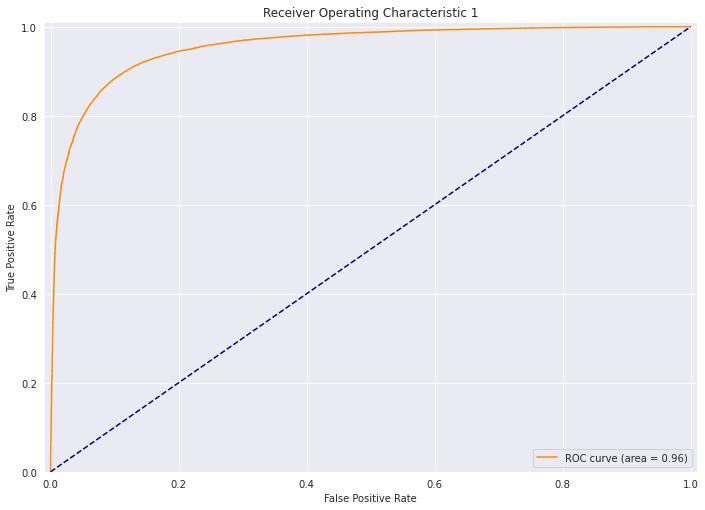

In [34]:

plt.figure()
figure(figsize=(11.7, 8.27))
plt.plot(fpr,tpr,color="darkorange",label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic 1')
plt.legend(loc="lower right")
plt.savefig(f"../images//joint_samples_ROC1.svg", format="svg")
plt.show()